# KSA: Polar Observations and Modelling

## Week X, Class 1 - Ship based in situ ocean observations

This class we are going to learn how to use CTD observations. CTD stands for "Conductivity Temperature Depth" and refers to a collection of electronic instruments that are deployed from a ship, sampling a water column in depth space. A CTD consists of three different sensors:
 - A pressure sensor which measures the pressure of the water column above it. 
 - A temperature sensor.
 - A conductivity sensor, which measures how water conduces electricity, from which we can calculate the salinity of water.

 The CTD is usually attached to a metal rosette, where we have also attached a number of Niskin bottles. These bottles can be closed at different depths to collect water, from which we can take samples to measure different variables. One of the most important samples is used to measure salinity directly in the lab to calibrate the salinity inferred by the conductivity sensor. But water can also be used to measure variables we don't have sensors for (such as iron or other trace metals).

 If you want to learn more about how these measurements are taken, checkout [link](link)!

## Exploring a CTD profile

### Load libraries

Python libraries are ready-to-use collections of code that make our life significantly easier. There are different libraries with different functionalities (e.g. numerical operations, plottting and visualisation). We need to load them in order to use them. 

The semantics to load libraries is usually:
```
import library as name_we_give_it
```
and so we can call functions from the library using the name. For example, the library `numpy` allows us to perform matrices operations, all sorts of algebra and mathematical operations. We can load it, and then calculate the square root of a number, or the sine of another:
```
import numpy as np
np.sqrt(16)
np.sine(90)
```

In [61]:
# Library to explore file systems
import glob
# TEOS-10 (thermodynamic equation of sea water) library
import gsw
# Plotting library
import matplotlib.pyplot as plt
# Matrices/algebra/etc library
import numpy as np
# All-time-favourite library for using "labelled" data
import xarray as xr

We have our CTD profiles stored in the `data` folder. The files come in `netCDF` format, commonly used for oceanographic/meteorologic data. Let's open one file using `xarray`:

In [99]:
CTD = xr.open_dataset('data/in2024_v01010CtdAvg.nc')

Let's take a look at what this created:

In [100]:
CTD

<xarray.Dataset>
Dimensions:              (time: 1, pressure: 413, latitude: 1, longitude: 1)
Coordinates:
  * time                 (time) datetime64[ns] 2024-01-14T11:43:29.547003392
  * pressure             (pressure) float64 6.0 7.0 8.0 ... 416.0 417.0 417.6
  * latitude             (latitude) float64 -66.48
  * longitude            (longitude) float64 144.9
Data variables: (12/28)
    woce_date            (time) float64 ...
    woce_time            (time) float64 ...
    temperature          (longitude, latitude, pressure, time) float64 ...
    temperatureFlag      (longitude, latitude, pressure, time) float32 ...
    conductivity         (longitude, latitude, pressure, time) float64 ...
    conductivityFlag     (longitude, latitude, pressure, time) float32 ...
    ...                   ...
    transmissometer      (longitude, latitude, pressure, time) float64 ...
    transmissometerFlag  (longitude, latitude, pressure, time) float32 ...
    fluorometer          (longitude, latitude, pressure, time) float64 ...
    fluorometerFlag      (longitude, latitude, pressure, time) float32 ...
    obs                  (longitude, latitude, pressure, time) float64 ...
    obsFlag              (longitude, latitude, pressure, time) float32 ...
Attributes: (12/14)
    WOCE_Version:    3.0
    Conventions:     COARDS/WOCE/CF-1.5
    History:         Created on 07-May-2024 11:45:34
    Organisation:    CSIRO Marine Research
    Survey:          in2024_v01
    Vessel:          Unknown
    ...              ...
    StartTime:       14-Jan-2024 11:43:29
    BottomTime:      14-Jan-2024 11:53:37
    EndTime:         14-Jan-2024 12:32:12
    WaterDepth:      425.98
    MinAltitude:     Unknown
    PressureBin:     1

`CTD` is an `xarray.Dataset` that contains the following information:
1. Dimensions: names and lengths of the "axes" of our dataset. In this case we have:


        dimensions: (time: 1, pressure: 413, latitude: 1, longitude: 1)
        
     This means that we have a time dimension of length 1 which is the date and time the profile was made; a pressure dimension of length 413, meaning 413 depths sampled, and latitude, longitude dimensions of length 1 that tell us where the CTD was taken.

2. Coordinates: the actual values within each dimension. We can see that this profile was taken the 14th of Jan 2024, at 66.48S, 144.9W. 

3. Variables: data from different sensors. The subscript `_2` indicate it is a secondary sensor, which acts as a "failsafe" were the primary instruments to fail in any way.

4. Attributes: "metadata" for the profile. That usually includes who created the file, on what date, etc. Individual variables also have attributes indicating sensor used, units etc.

In [101]:
CTD['temperature']

<xarray.DataArray 'temperature' (longitude: 1, latitude: 1, pressure: 413,
                                 time: 1)>
[413 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2024-01-14T11:43:29.547003392
  * pressure   (pressure) float64 6.0 7.0 8.0 9.0 ... 415.0 416.0 417.0 417.6
  * latitude   (latitude) float64 -66.48
  * longitude  (longitude) float64 144.9
Attributes:
    long_name:      Primary Temperature
    standard_name:  Temperature
    units:          deg C (ITS-90)
    data_min:       -1.871768749280698
    data_max:       -0.7049766767733877
    valid_range:    [-10.  40.]
    manufacturer:   Sea-Bird Electronics Inc
    model:          SBE3T
    serialNo:       2751
    unitNo:         1.0

### Creating a figure

Let's try a couple of ways of visualising this profile! We will start with temperature and salinity, which are two of the most important oceanographic variables in this dataset.

First, lets get temperature and salinity and squeeze them to remove all dimensions of length == 1.

In [102]:
temperature = CTD['temperature'].squeeze()
salinity = CTD['salinity'].squeeze()

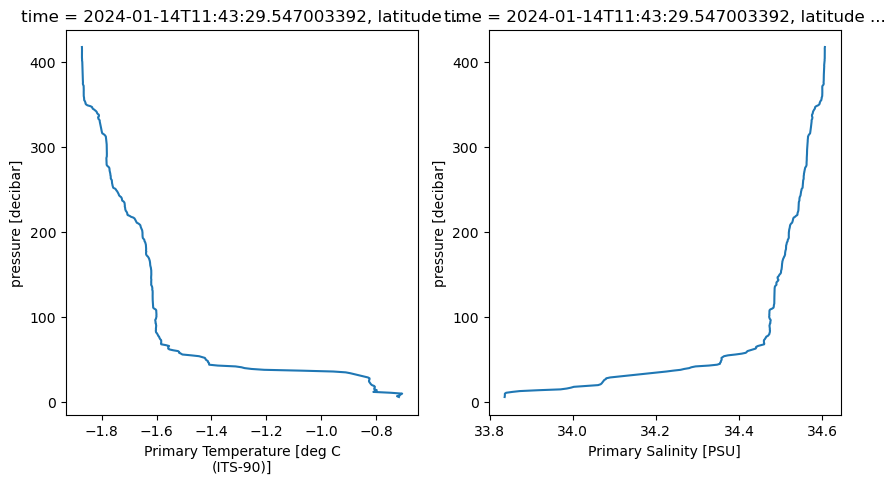

In [183]:
# Create a figure instance
fig = plt.figure(figsize = (10,5))
# Add two axes to the figure, one for temperature and one for salinity
axs = [fig.add_subplot(121), fig.add_subplot(122)]

# Plot temperature
temperature.plot(ax = axs[0], y = 'pressure')
# Plot salinity
salinity.plot(ax = axs[1], y = 'pressure');

#### Question 1

You can use [CoPilot](https://copilot.microsoft.com/) to understand what each of the functions we used to plot does. What does fig.add_subplot() do? How can you modify it to have a figure with four panels (2 rows and 2 columns)?

#### Notes on the code above

This is a minimal plotting example. We can definitely make improvements! For example, right now the yaxis is showing us larger pressures (bottom of the cast) at the top. Flipping it will make it more intuitive to read. We should also add labels to indicate what variable is represented in each axis, add gridlines so that it is easier to identify values at different points of the profile, change the colors, add a title with profile information, etc. 

Tweaking can be one of the easiest ways to loose days to a figure, but it can also make the difference between others understanding what you are showing or not. 


Let's calculate the (potential) density of this profile using a function for `gsw`. This library allows for many useful calculations in oceanography. You can see all the functions available and the input they take [here](https://teos-10.github.io/GSW-Python/gsw_flat.html).

We will use the function `gsw.pot_rho_t_exact()`. Let's see what it takes as input:

In [104]:
help(gsw.pot_rho_t_exact)

Help on function pot_rho_t_exact in module gsw._wrapped_ufuncs:

pot_rho_t_exact(SA, t, p, p_ref)
    Calculates potential density of seawater.  Note. This function outputs
    potential density, not potential density anomaly; that is, 1000 kg/m^3
    is not subtracted.
    
    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    t : array-like
        In-situ temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    p_ref : array-like
        Reference pressure, dbar
    
    Returns
    -------
    pot_rho_t_exact : array-like, kg/m^3
        potential density (not potential density anomaly)



Our CTD profile containes *practical salinity*, which is not the same as *absolute salinity*. But not to worry! `gsw` will help us again with `gsw.SA_from_SP`.

In [68]:
help(gsw.SA_from_SP)

Help on function SA_from_SP in module gsw._wrapped_ufuncs:

SA_from_SP(SP, p, lon, lat)
    Calculates Absolute Salinity from Practical Salinity.  Since SP is
    non-negative by definition, this function changes any negative input
    values of SP to be zero.
    
    Parameters
    ----------
    SP : array-like
        Practical Salinity (PSS-78), unitless
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    lon : array-like
        Longitude, -360 to 360 degrees
    lat : array-like
        Latitude, -90 to 90 degrees
    
    Returns
    -------
    SA : array-like, g/kg
        Absolute Salinity



In [105]:
absolute_salinity = gsw.SA_from_SP(salinity, CTD['pressure'], CTD['longitude'], CTD['latitude'])
absolute_salinity = absolute_salinity.squeeze()

Now we are ready to calculate potential density referenced to the surface (`p_ref = 0`). This is the density that the water would have if taken adiabatically to the surface, or in other words, removing the effect of pressure on density.

In [106]:
density = gsw.pot_rho_t_exact(absolute_salinity, temperature, CTD['pressure'], 0)
density = density.rename('density')

Now let's plot all temperature, salinity and density. Since we are at it, let's add oxygen to the plot too!

In [107]:
oxygen = CTD['oxygen'].squeeze()

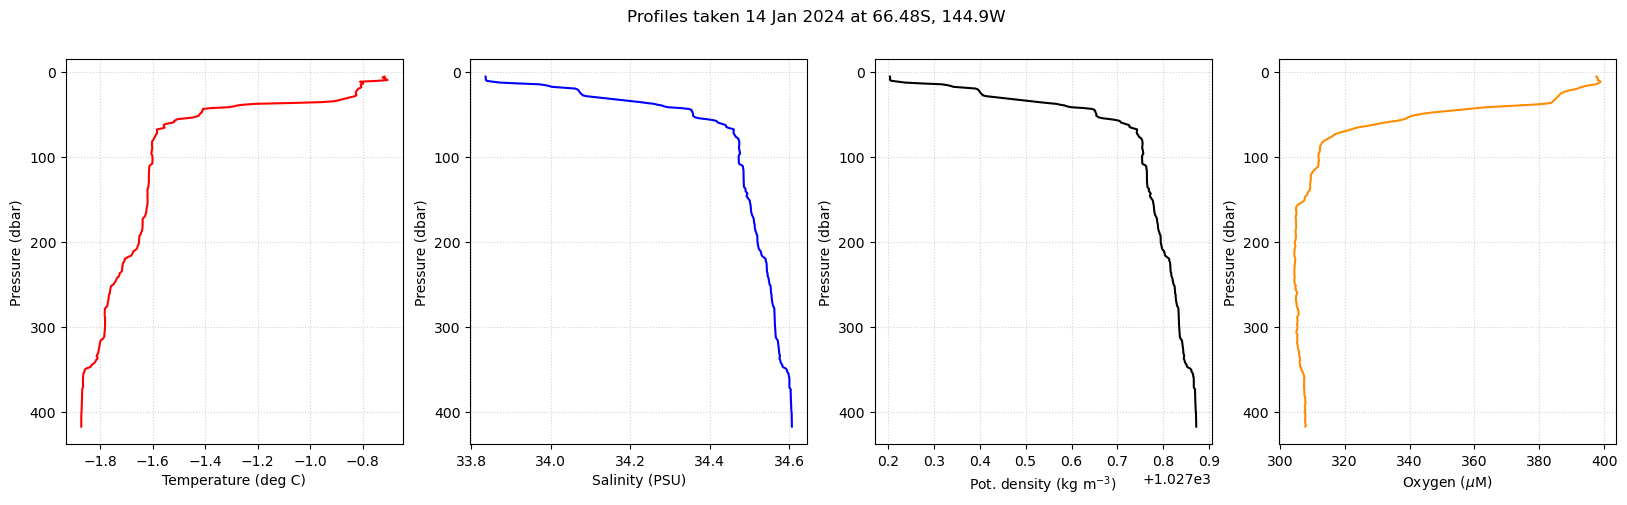

In [150]:
# Create a figure instance
fig = plt.figure(figsize = (20,5))
# Add two axes to the figure
axs = [fig.add_subplot(141), fig.add_subplot(142), 
       fig.add_subplot(143), fig.add_subplot(144)]

# Plot temperature (in red)
temperature.plot(ax = axs[0], y = 'pressure', color = 'red', label = None)
# Plot salinity (in blue)
salinity.plot(ax = axs[1], y = 'pressure', color = 'blue')
# Plot density (in black)
density.plot(ax = axs[2], y = 'pressure', color = 'k')
# Plot oxygen (in orange)
oxygen.plot(ax = axs[3], y = 'pressure', color = 'darkorange')

# Let's iterate through the axis instead of tweaking them 1 by 1.
for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')   
    ax.set_title('') 

# The xlabels still need to be set individually
axs[0].set_xlabel('Temperature (deg C)')
axs[1].set_xlabel('Salinity (PSU)')
axs[2].set_xlabel('Pot. density (kg m$^{-3}$)')
axs[3].set_xlabel('Oxygen ($\mu$M)')
# Add a title
fig.suptitle('Profiles taken 14 Jan 2024 at 66.48S, 144.9W');

If you wanted to save the figure above, you can do it like this:

    plt.savefig('path_to_location/name.jpg', bbox_inches = 'tight')

#### Question 2

Can you identify the mixed layer, thermocline and pycnocline depths in this profile? Try changing the limits of the `yaxis` to help you visualize these regions better.

*Answer here*

## Comparing the CTD profile to Niskin bottle data

Water samples collected in the Niksin bottles at different depths are used to:
 - Check the accuracy of the electronic sensors on the CTD
 - Correct biases in the sensors

The water samples can be analysed for salinity and oxygen (as well as other variables), but not for temperature because the temperature of the water in the bottles changes rapidly.

Let's open and look at the "hydro" file (short for HydroChem which is the team that analyses water samples in the lab):

In [109]:
hydro = xr.open_dataset('data/in2024_v01Hydro010.nc')
hydro

<xarray.Dataset>
Dimensions:            (time: 1, pressure: 36, latitude: 1, longitude: 1,
                        string: 10)
Coordinates:
  * time               (time) datetime64[ns] 2024-01-14T12:34:38.082995200
  * pressure           (pressure) float64 3.3 3.4 15.1 ... 419.4 419.4 419.4
  * latitude           (latitude) float64 -66.48
  * longitude          (longitude) float64 144.9
Dimensions without coordinates: string
Data variables: (12/25)
    woce_date          (time) float64 ...
    woce_time          (time) float64 ...
    firingTime         (longitude, latitude, pressure, time) float64 ...
    firingLatitude     (longitude, latitude, pressure, time) float64 ...
    firingLongitude    (longitude, latitude, pressure, time) float64 ...
    rosettePosition    (longitude, latitude, pressure, time) float32 ...
    ...                 ...
    silicate           (longitude, latitude, pressure, time) float64 ...
    silicateFlag       (longitude, latitude, pressure, time) float32 ...
    ammonia            (longitude, latitude, pressure, time) float64 ...
    ammoniaFlag        (longitude, latitude, pressure, time) float32 ...
    nitrite            (longitude, latitude, pressure, time) float64 ...
    nitriteFlag        (longitude, latitude, pressure, time) float32 ...
Attributes:
    WOCE_Version:  3.0
    Conventions:   COARDS/WOCE/CF-1.5
    Survey:        in2024_v01
    Deployment:    10.0
    StartTime:     14-Jan-2024 11:35:26
    BottomTime:    14-Jan-2024 11:53:37
    EndTime:       14-Jan-2024 12:34:38
    Operator:      Kathy
    BottomDepth:   [416.339988 425.699987 426.789987]
    HyproVersion:  5.7

You can see that now, the pressure dimension is of length 36, because we had 36 bottles on the rosette.

#### Question 3

If we only have 36 bottles, we need to be thoughtfull about the depths we collect samples for. Keeping in mind that the main goal is to calibrate our conductivity and oxygen sensors, and looking at the profiles we plotted above, where would you have chose to sample this CTD?

**Tip: ideally, you would be able to reproduce the shape of the profile by linearly interpolating between bottles.**

*Answer here*

In [163]:
salinity_bottle = hydro['salinity'].squeeze()
oxygen_bottle = hydro['oxygen'].squeeze()

#### Question 4

Some depths are very important, so we close **2** bottles just in case one fails and doesn't close properly, and/or we have enough litres for all the lab analysis we want. Take a look at the depths we closed bottles at. Can you identify at what regions of the water column we duplicated bottles?

In [164]:
salinity_bottle['pressure'].values

array([  3.3,   3.4,  15.1,  15.1,  15.2,  20.2,  32. ,  32.1,  32.1,
        45.1,  45.1,  45.1,  75.2,  75.2,  75.3, 100.1, 100.2, 120.1,
       120.1, 150.3, 150.3, 150.3, 200.4, 224.5, 250.3, 250.4, 300.2,
       335.3, 349.8, 349.8, 375.2, 400.3, 400.4, 419.4, 419.4, 419.4])

*Answer here*

Lets remove the duplicates:

In [165]:
salinity_bottle = salinity_bottle.drop_duplicates(dim = 'pressure')
oxygen_bottle = oxygen_bottle.drop_duplicates(dim = 'pressure')

Let's plot sensor and bottle data together:

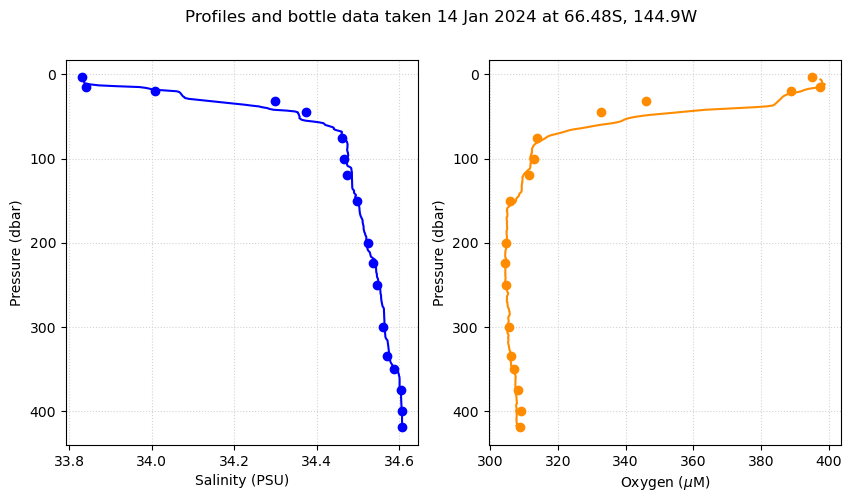

In [179]:
# Create a figure instance
fig = plt.figure(figsize = (10,5))
# Add two axes to the figure
axs = [fig.add_subplot(121), fig.add_subplot(122)]

# Plot sensor salinity (in blue)
salinity.plot(ax = axs[0], y = 'pressure', color = 'blue')
# Plot bottle salinity (with blue circles)
salinity_bottle.plot(ax = axs[0], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'blue', markeredgecolor = 'blue')
# Plot sensor oxygen (in orange)
oxygen.plot(ax = axs[1], y = 'pressure', color = 'darkorange')
oxygen_bottle.plot(ax = axs[1], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'darkorange', markeredgecolor = 'darkorange')

# Let's iterate through the axis instead of tweaking them 1 by 1.
for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')    
    ax.set_title('')

# The xlabels still need to be set individually
axs[0].set_xlabel('Salinity (PSU)')
axs[1].set_xlabel('Oxygen ($\mu$M)')
# Add a title
fig.suptitle('Profiles and bottle data taken 14 Jan 2024 at 66.48S, 144.9W');

To compare the sensor to bottle data, we can subsample the sensor profile to the bottle depths. We can do that easily using the `.sel()` function:

In [114]:
salinity_sensor = salinity.sel(pressure = salinity_bottle['pressure'], method = 'nearest')
oxygen_sensor = oxygen.sel(pressure = oxygen_bottle['pressure'], method = 'nearest')

Using `method = 'nearest'` allows us to select the nearest pressures, otherwise the levels would have to be *identical*.

Now let's look at the difference:

In [117]:
salinity_difference = salinity_sensor.values - salinity_bottle
oxygen_difference = oxygen_sensor.values - oxygen_bottle

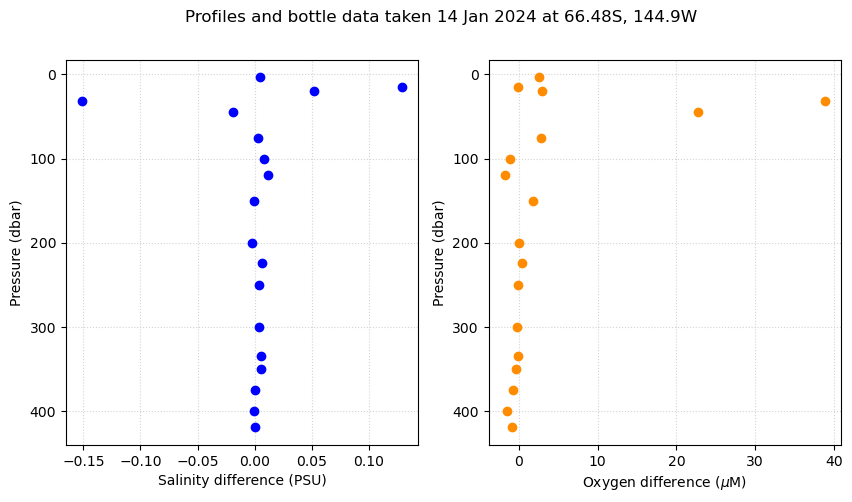

In [182]:
# Create a figure instance
fig = plt.figure(figsize = (10,5))
# Add two axes to the figure
axs = [fig.add_subplot(121), fig.add_subplot(122)]

# Plot salinity difference (in blue)
salinity_difference.plot(ax = axs[0], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'blue', markeredgecolor = 'blue')
# Plot sensor oxygen (in orange)
oxygen_difference.plot(ax = axs[1], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'darkorange', markeredgecolor = 'darkorange')

# Let's iterate through the axis instead of tweaking them 1 by 1.
for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')   
    ax.set_title('') 

# The xlabels still need to be set individually
axs[0].set_xlabel('Salinity difference (PSU)')
axs[1].set_xlabel('Oxygen difference ($\mu$M)')
# Add a title
fig.suptitle('Profiles and bottle data taken 14 Jan 2024 at 66.48S, 144.9W');

#### Question 5

Looking at the plot above, we can see that the difference between sensor and bottle data seems larger at the surface. Can you think of a reason why?

*Answer here*

#### Question 6

You can see in the `CTD` file that we have data from 2 sensors for each variable. Make a plot comparing both sensors.

**Tip: this can either be profiles with both sensors on the same axis, a plot of the difference between sensors, a plot of sensor 1 vs sensor 2, etc.**

Don't be afraid of using [CoPilot](https://copilot.microsoft.com/)!

*Answer here*